In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.neighbors import NearestNeighbors
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# mount the data needed to drive folder so we can use them in colab, see the data download link in Practical 4a.1
from google.colab import drive
!mkdir drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [3]:
#  list all the data in your drive folder to see if mount successfully.
!ls "drive/My Drive/"

data_DL_practical  DL_practical  models


# Data
We load the neural codes for the Caltech101 image data set, obtained from a pre-trained VGG16 network in "Practical-3.3.0_preprocess-caltech101.ipynb".

In [0]:
fold_path=os.path.join("drive","My Drive","data_DL_practical", "caltech101")
with open(os.path.join(fold_path,"caltech101_VGG16_fc2.p"), "rb") as f:
    X_fc2, y, X_paths, classes = pickle.load(f)

# Nearest Neighbor Classifier
For image search, we can train a simple nearest neighbor classifier from scikit-learn. Here we use the L2-norm (Lp-norm with p=2) as a distance measure between representations.

In [6]:
neigh = NearestNeighbors(n_neighbors=5, p=2)
neigh.fit(X_fc2)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

Let's test it on some images from the dataset itself. For each example input image, we obtain the (L2) distances to its 5 nearest neighbors, as well as the indices of those nearest neighbors.

In [7]:
indices = [1000, 1500, 2000]
X = X_fc2[indices]
nn = neigh.kneighbors(X)
nn  # nn = (distances, indices)

(array([[ 0.        , 54.34122001, 56.12523299, 58.92762299, 58.9847434 ],
        [ 0.        , 47.0434782 , 47.96154649, 49.42489316, 50.17213281],
        [ 0.        , 51.24238222, 55.73567541, 58.75446908, 59.00200155]]),
 array([[1000, 1105, 1211, 1241, 1600],
        [1500, 1128, 1269,  892, 1547],
        [2000, 2023, 1948, 1995, 1947]]))

Let's visualise the examples (input images) we chose.

Class: Motorbikes


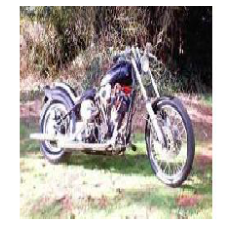

Class: Motorbikes


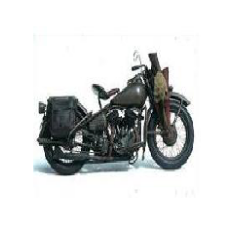

Class: watch


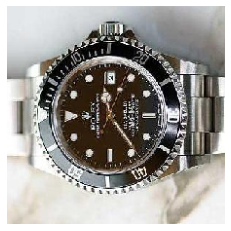

In [8]:
def show_img(filepath):
    img = image.load_img(filepath, target_size=(224,224))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

for i in indices:
    print("Class:", classes[y[i]])
    show_img(X_paths[i])

Now we visualise each of the input images along with their 5 nearest neighbors.

============= original: =============
(Class: Motorbikes)


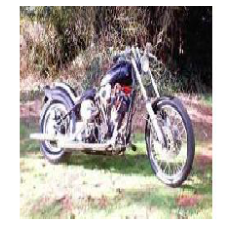

at distance 0.0:
(Class: Motorbikes)


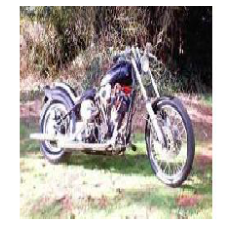

at distance 54.34122001219158:
(Class: Motorbikes)


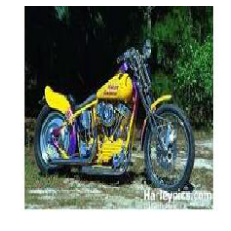

at distance 56.12523298744317:
(Class: Motorbikes)


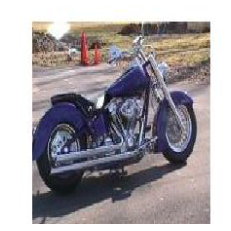

at distance 58.92762299429001:
(Class: Motorbikes)


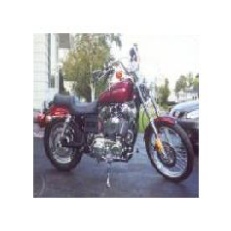

at distance 58.984743404759826:
(Class: Motorbikes)


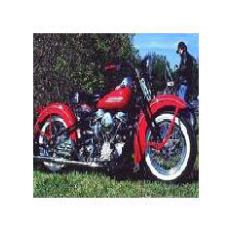

============= original: =============
(Class: Motorbikes)


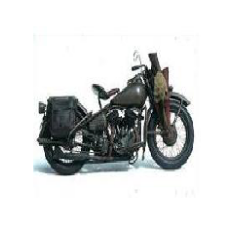

at distance 0.0:
(Class: Motorbikes)


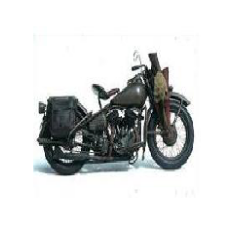

at distance 47.04347819765132:
(Class: Motorbikes)


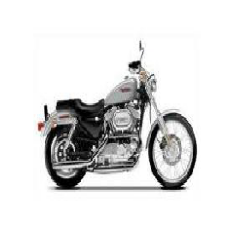

at distance 47.961546490200384:
(Class: Motorbikes)


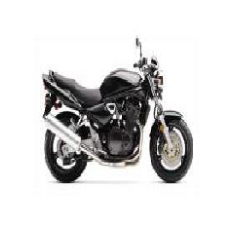

at distance 49.424893155474365:
(Class: Motorbikes)


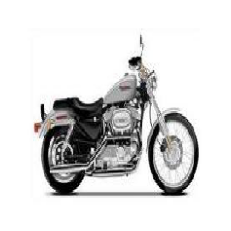

at distance 50.17213281247097:
(Class: Motorbikes)


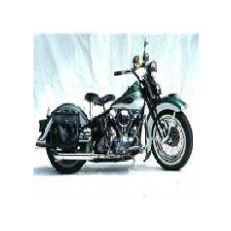

============= original: =============
(Class: watch)


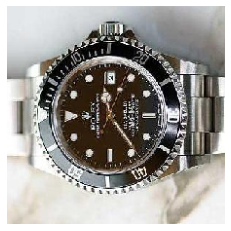

at distance 0.0:
(Class: watch)


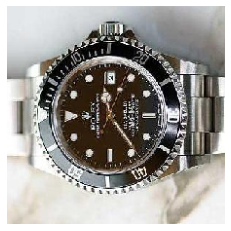

at distance 51.24238221654541:
(Class: watch)


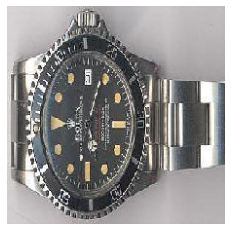

at distance 55.7356754080004:
(Class: watch)


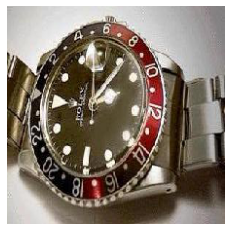

at distance 58.75446907686234:
(Class: watch)


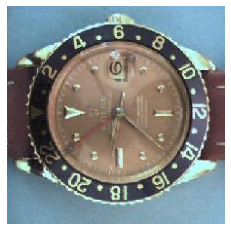

at distance 59.002001550716066:
(Class: watch)


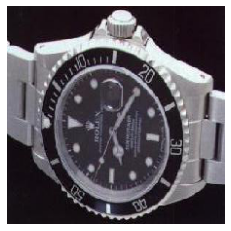

In [9]:
for i, distances, nn_indices in zip(indices, nn[0], nn[1]):
    print("============= original: =============")
    print("(Class: {})".format(classes[y[i]]))
    show_img(X_paths[i])
    for dist, j in zip(distances, nn_indices):
        print("at distance {}:".format(dist))
        print("(Class: {})".format(classes[y[j]]))
        show_img(X_paths[j])